In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import math

In [2]:
X = []
Y = []
for i in range(10000):
    x1 = np.random.uniform(0,4)
    x2 = np.random.uniform(0,8)
    if(x1+x2<=4):
        y = 0
        X.append([x1,x2])
        Y.append(y)
    elif (x1+x2)>4  and (x1/4+x2/8)<1:
        y = 1
        Y.append(y)
        X.append([x1,x2])
    
X_data = np.array(X)
Y_data = np.array(Y)
X_new = X_data.copy()
Y_new = Y_data.copy()

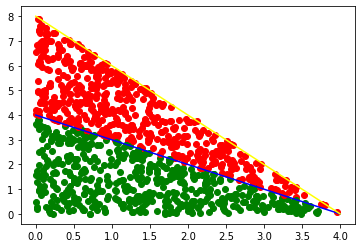

In [3]:
fig, ax = plt.subplots()
colors = ['green','red']
for x1,x2 in zip(X_data[:1000,0],X_data[:1000,1]):
    if x1+x2<4:
        ax.scatter(x1,x2,color=colors[0])
    else:
        ax.scatter(x1,x2,color=colors[1])
    
x = np.linspace(0,4,100)
y = 4-x
plt.plot(x,y,color='blue')
x = np.linspace(0,4,100)
y = 8-2*x
plt.plot(x,y,color='yellow')
plt.show()


In [4]:
# x1 = X_data[:,0]/4
# x2 = X_data[:,1]/8
# X_data[:,0] = x1
# X_data[:,1] = x2


In [5]:
allData = list(zip(X_data,Y_data))
np.random.shuffle(allData)

In [37]:
def forward_prop(x,m,b):
    return np.dot(m,x)+b

def sigmoid(x,derivative=False):
    if derivative:
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(x,0)

def loss(y_pred,y_actual):
    return - np.sum((y_actual*np.log(y_pred) + (1-y_actual)*np.log(1-y_pred)))
    

def gradientDescent(X,y,learning_rate=0.01,epochs=10):
    m = np.random.uniform(0,1,(1,X[0].shape[0]))
    b  = np.zeros((1,1))
    for i in range(epochs):
        for eachX,eachY in allData:
            predicted_y_actual = forward_prop(eachX,m,b)
            predicted_y = sigmoid(predicted_y_actual)
            m_gradient,b_gradient = backprop(eachX,eachY,predicted_y,predicted_y_actual)
            m = m-learning_rate*m_gradient
            b = b-learning_rate*b_gradient
    return m,b 
def backprop(x,y,y_hat,y_pred_actual):
    loss_derivative = -1*y/y_hat + (1-y)/(1-y_hat)
    sigmoid_derv = sigmoid(y_pred_actual,True)
    b_gradient = loss_derivative*sigmoid_derv
    #b_gradient can be replaced by y_pred-y
    #it gives same result!!! I fucking love math!
    x  = np.reshape(x,(2,1))
    m_gradient  = np.dot(b_gradient,x.T)
    return m_gradient,b_gradient
    
    

In [38]:
m,b = gradientDescent(X_data,Y_data)

In [39]:
print(m,b)

[[2.58493811 2.89107859]] [[-10.82854508]]


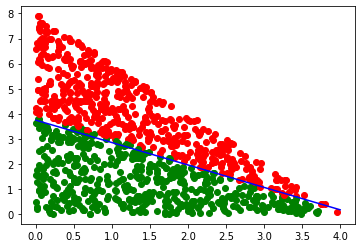

In [9]:
fig, ax = plt.subplots()
colors = ['green','red']
for x1,x2 in zip(X_data[:1000,0],X_data[:1000,1]):
    if x1+x2<4:
        ax.scatter(x1,x2,color=colors[0])
    else:
        ax.scatter(x1,x2,color=colors[1])
    
x1 = np.linspace(0,4,100)
y = ((m[0][0]*x1+b[0][0])/-m[0][1])
plt.plot(x1,y,color='blue')
plt.show()

In [ ]:
#that was linear decision boundary! Now I should go for non-linear decision boundary to check if logistic regression can do! 


In [36]:
X = []
Y = []
for i in range(100):
    x1 = np.random.uniform(-2,2)
    x2 = np.random.uniform(-4,4)
    if(x1**2+x2**2<=4):
        y = 0
        X.append([x1,x2])
        Y.append(y)
    elif (x1**2+x2**2)>4  and (x1**2+x2**2)<16:
        y = 1
        Y.append(y)
        X.append([x1,x2])
    
X_data = np.array(X)
Y_data = np.array(Y)
X_new = X_data.copy()
Y_new = Y_data.copy()

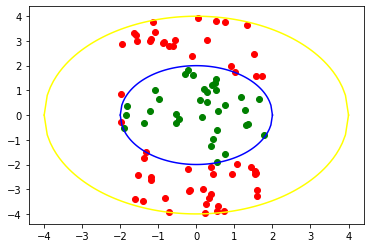

In [32]:
fig, ax = plt.subplots()
colors = ['green','red']
for x1,x2 in zip(X_data[:,0],X_data[:,1]):
    if(x1**2+x2**2<=4):
        ax.scatter(x1,x2,color=colors[0])
    else:
        ax.scatter(x1,x2,color=colors[1])
    
x1 = np.linspace(-2,2,100)
x2 = np.sqrt(4-x1**2)
plt.plot(x1,x2,color='blue')
plt.plot(x1,-x2,color='blue')


x1 = np.linspace(-4,4,100)
x2 = np.sqrt(16-x1**2)
plt.plot(x1,x2,color='yellow')
plt.plot(x1,-x2,color='yellow')

plt.show()

c:\users\sanjiv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


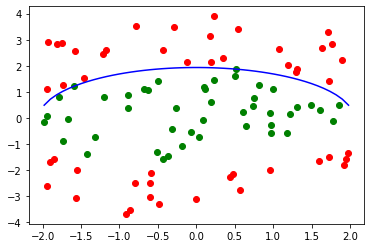

In [40]:
fig, ax = plt.subplots()
colors = ['green','red']
for x1,x2 in zip(X_data[:,0],X_data[:,1]):
    if(x1**2+x2**2<=4):
        ax.scatter(x1,x2,color=colors[0])
    else:
        ax.scatter(x1,x2,color=colors[1])

x1 = np.linspace(-4,4,100)
y = np.sqrt(((m[0][0]*x1**2+b[0][0])/-m[0][1]))
plt.plot(x1,y,color='blue')
plt.show()